### Emotion Detector App using Streamlit
- Detecting emotion
- Text Classifier

In [66]:
# Import Packages

import joblib

# Exploratory Data Analysis (EDA) Packages
import pandas as pd
import numpy as np

# Visualization Packages
import matplotlib.pyplot as plt
import seaborn as sns

# Text Cleaning 
import neattext.functions as nfx

# Machine Learning Packages
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


# Importing all models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.ensemble import AdaBoostClassifier

#importing pycaret
from pycaret.datasets import get_data
from pycaret.classification import * 

ModuleNotFoundError: No module named 'pycaret'

In [48]:
# Setting properties
pd.set_option('display.max_colwidth', None)

In [49]:
# Load the dataset
df = pd.read_csv("../data/emotion_dataset_raw.csv")

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34792 entries, 0 to 34791
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Emotion  34792 non-null  object
 1   Text     34792 non-null  object
dtypes: object(2)
memory usage: 543.8+ KB


In [29]:
df.head()

,Emotion,Text
0,neutral,Why ?
1,joy,Sage Act upgrade on my to do list for tommorow.
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN I HATE FUNERALS THIS REALLY SHOWS ME HOW BLESSED I AM
3,joy,"Such an eye ! The true hazel eye-and so brilliant ! Regular features , open countenance , with a complexion , Oh ! What a bloom of full health , and such a pretty height and size ; such a firm and upright figure ! There is health , not merely in her bloom , but in her air , her head , her glance . One hears sometimes of a child being ' the picture of health ' ; now , she always gives me the idea of being the complete picture of grown-up health . She is loveliness itself ."
4,joy,"@Iluvmiasantos ugh babe.. hugggzzz for u .! babe naamazed nga ako e babe e, despite nega's mas pinaramdam at fil ko ang"


In [51]:
df['Emotion'].unique()

array(['neutral', 'joy', 'sadness', 'fear', 'surprise', 'anger', 'shame',
       'disgust'], dtype=object)

In [52]:
# Counting rows for Emotion types
df['Emotion'].value_counts()

joy         11045
sadness      6722
fear         5410
anger        4297
surprise     4062
neutral      2254
disgust       856
shame         146
Name: Emotion, dtype: int64

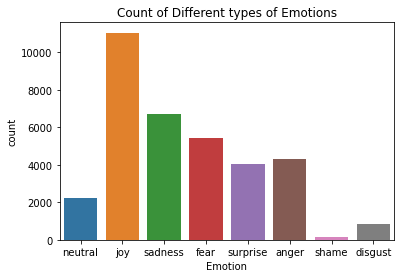

In [53]:
### Plot count of emotions
sns.countplot(x='Emotion', data=df)
plt.title("Count of Different types of Emotions")
plt.show()

In [11]:
df.shape

(34792, 2)

In [54]:
df.drop_duplicates().shape

(31162, 2)

In [55]:
df = df.drop_duplicates()

In [56]:
df.drop_duplicates(['Text']).shape

(31110, 2)

In [57]:
# Data Cleaning
dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [58]:
# Removing Stopwords
df['CleanText'] = df['Text'].apply(nfx.remove_stopwords)

In [59]:
# Remove Numbers
df['CleanText'] = df['CleanText'].apply(nfx.remove_numbers)

In [60]:
# Removing user handles
df['CleanText'] = df['CleanText'].apply(nfx.remove_userhandles)

In [61]:
df.head()

,Emotion,Text,CleanText
0,neutral,Why ?,?
1,joy,Sage Act upgrade on my to do list for tommorow.,Sage Act upgrade list tommorow.
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN I HATE FUNERALS THIS REALLY SHOWS ME HOW BLESSED I AM,WAY HOMEGIRL BABY FUNERAL!!! MAN HATE FUNERALS SHOWS BLESSED
3,joy,"Such an eye ! The true hazel eye-and so brilliant ! Regular features , open countenance , with a complexion , Oh ! What a bloom of full health , and such a pretty height and size ; such a firm and upright figure ! There is health , not merely in her bloom , but in her air , her head , her glance . One hears sometimes of a child being ' the picture of health ' ; now , she always gives me the idea of being the complete picture of grown-up health . She is loveliness itself .","eye ! true hazel eye-and brilliant ! Regular features , open countenance , complexion , Oh ! bloom health , pretty height size ; firm upright figure ! health , merely bloom , air , head , glance . hears child ' picture health ' ; , gives idea complete picture grown-up health . loveliness ."
4,joy,"@Iluvmiasantos ugh babe.. hugggzzz for u .! babe naamazed nga ako e babe e, despite nega's mas pinaramdam at fil ko ang","ugh babe.. hugggzzz u .! babe naamazed nga ako e babe e, despite nega's mas pinaramdam fil ko ang"


In [62]:
class md:
  bold = '\033[1m'
  end = '\033[0m'

In [63]:
def buildModels(x_train, x_test, y_train, y_test):
      
    dfs = results = names = []
    
    models = [
      ('LGR', LogisticRegression()),
      ('RFC', RandomForestClassifier()),
      ('KNN', KNeighborsClassifier()),
      ('SVM', SVC(probability=True)),
      ('XGB', XGBClassifier()),
      ('ETC', ExtraTreesClassifier()),
      ('KMC', KMeans()),
      ('DTC', DecisionTreeClassifier()),
      ('RDC', RidgeClassifier()),
      ('ADA', AdaBoostClassifier())
    ]
    
    modelScore = []
    for model in models:
        print(md.bold + "========================================  " + model[0] + "  ========================================" + md.end)
        # Creating pipeline
        print(md.bold + "Creating Pipeline..." + md.end)
        pipeline = Pipeline(steps=[('cv', CountVectorizer()), model])
        
        # Training model
        print(md.bold + "Training Model..." + md.end)
        pipeline.fit(x_train, y_train)
        
        # Getting Results
        print(md.bold + "Data:" + md.end)
        print(pipeline.predict(["I am broke"]))
        # print(pipeline.predict_proba(["I am broke"]))
        Score = pipeline.score(x_test, y_test)
        print("Score:", Score)
        modelScore.append(Score)
        
        # Storing model
        print(md.bold + "Storing Model..." + md.end)
        with open(f"../Models/{model[0]}.pkl", "wb") as ec:
            joblib.dump(pipeline, ec)
        print(md.bold + "Process Complete!!\n\n\n" + md.end)
    print("Highest accuracy:", models[modelScore.index(max(modelScore))])

Target Variables = labels, y, dependent variable: Emotion column
Feature - independent variables: Clean Text

In [64]:
x_train, x_test, y_train, y_test = train_test_split(
    df['CleanText'], df['Emotion'], test_size=0.20, random_state=30)

In [65]:
buildModels(x_train, x_test, y_train, y_test)

========================================  LGR  ========================================
Creating Pipeline...
Training Model...


c:\users\anand\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Data:
['sadness']
Score: 0.5801379752927964
Storing Model...
Process Complete!!



========================================  RFC  ========================================
Creating Pipeline...
Training Model...
Data:
['sadness']
Score: 0.5405101877105728
Storing Model...
Process Complete!!



========================================  KNN  ========================================
Creating Pipeline...
Training Model...
Data:
['neutral']
Score: 0.19894111984598106
Storing Model...
Process Complete!!



========================================  SVM  ========================================
Creating Pipeline...
Training Model...
Data:
['sadness']
Score: 0.5721161559441681
Storing Model...
Process Complete!!



========================================  XGB  ========================================
Creating Pipeline...
Training Model...


c:\users\anand\appdata\local\programs\python\python39\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:10:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Data:
['sadness']
Score: 0.5443606609979144
Storing Model...
Process Complete!!



========================================  ETC  ========================================
Creating Pipeline...
Training Model...
Data:
['sadness']
Score: 0.5440397882239691
Storing Model...
Process Complete!!



========================================  KMC  ========================================
Creating Pipeline...
Training Model...
Data:
[2]
Score: -46787.0683722809
Storing Model...
Process Complete!!



========================================  DTC  ========================================
Creating Pipeline...
Training Model...
Data:
['sadness']
Score: 0.477298251243382
Storing Model...
Process 